### Table of Contents

* [Step 1: Import Libraries & Download NLTK package](#step-1-import-libraries--download-nltk-package)
* [Step 2: Read in your favorite Gutenberg book](#step-2-read-in-your-favorite-gutenberg-book)
* [Step 3: Normalize text (all lowercase)](#step-3-normalize-text-all-lowercase)
* [Step 4: Remove stopwords](#step-4-remove-stopwords)
* [Step 5: Lemmatize](#step-5-lemmatize)
* [Step 6: POS tagging](#step-6-pos-tagging)
* [Step 7: Parsing & Chunking](#step-7-parsing--chunking)
* [Step 8: Inspect and count chunks](#step-8-inspect-and-count-chunks)
* [NLTK Sentiment Analyzer](#nltk-sentiment-analyzer)

<h3 id="step-1-import-libraries--download-nltk-package">Step 1: Import Libraries & Download NLTK package</h3>


In [1]:
from urllib import request # to open urls  
from nltk import pos_tag, RegexpParser # to help mark up words for what part of speech they are in context 
from nltk.corpus import stopwords, wordnet # to get rid of filler words
from nltk.stem import WordNetLemmatizer # to reduce words to their root forms 
from nltk.tokenize import RegexpTokenizer # to chop up text into little bits 
from nltk.tokenize import word_tokenize,sent_tokenize
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.classify import NaiveBayesClassifier 
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import pandas as pd 
import nltk
import matplotlib.pyplot as plt

In [2]:
#nltk.download() 

<h3 id="step-2-read-in-your-favorite-gutenberg-book">Step 2: Read in your favorite Gutenberg book</h3>

In [3]:
url = 'https://www.gutenberg.org/files/2500/2500-0.txt'

In [4]:
response = request.urlopen(url)
print(response)

In [5]:
raw = response.read().decode('utf8')
print(raw[:500])

The Project Gutenberg eBook of Siddhartha, by Herman Hesse

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using 


In [6]:
type(raw)

str

<h3 id="step-3-normalize-text-all-lowercase">Step 3: Normalize text (all lowercase)</h3>


In [7]:
normalised = raw.lower()
print(normalised[1072:1720])

ng

 second part
 kamala
 with the childlike people
 sansara
 by the river
 the ferryman
 the son
 om
 govinda




first part

to romain rolland, my dear friend




the son of the brahman


in the shade of the house, in the sunshine of the riverbank near the
boats, in the shade of the sal-wood forest, in the shade of the fig
tree is where siddhartha grew up, the handsome son of the brahman, the
young falcon, together with his friend govinda, son of a brahman. the
sun tanned his light shoulders by the banks of the river when bathing,
performing the sacred ablutions, the sacred offerings. in the mango
grove, sha


<h4> Tokenisation & Noise Removal in One Fell Swoop </h4>


In [8]:
tokeniser = RegexpTokenizer(r'\w+') # instantiates a tokeniser combined with a regular expression which selects only words
tokenised = tokeniser.tokenize(normalised)
print(tokenised[:500])

['the', 'project', 'gutenberg', 'ebook', 'of', 'siddhartha', 'by', 'herman', 'hesse', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'org', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', 'title', 'siddhartha', 'author', 'herman', 'hesse', 'translator', 'gunther', 'olesch', 'anke', 'dreher', 'amy', 'coulter', 'stefan', 'langer', 'and', 'semyon', 'chaichenets', 'release', 'date', 'february', '2001', 'ebook'

In [9]:
#sentence tokenizer
sents = nltk.sent_tokenize(raw)
print("The number of sentences is", len(sents))
words = nltk.word_tokenize(raw)
print("The number of words is", len(words))
average_tokens = round(len(words)/len(sents))
print("The average number of tokens per sentence is",average_tokens)
unique_tokens = set(words)
print("The number of unique tokens are", len(unique_tokens))

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
final_tokens = []
for each in words:
 if each not in stop_words:
    final_tokens.append(each)
print("The number of total tokens after removing stopwords are", len((final_tokens)))

The number of sentences is 1695
The number of words is 50987
The average number of tokens per sentence is 30
The number of unique tokens are 4565
The number of total tokens after removing stopwords are 30066


In [10]:
#Building a frequency distribution with NLTK
fd_words = nltk.FreqDist(words)
fd_sents = nltk.FreqDist(sents)

In [11]:
fd_words.most_common(10)
fd_words.tabulate(10)


   ,  the    .  and   to   of    a   he  his   in 
4873 2142 1469 1329 1212 1098  952  823  701  651 


In [12]:
fd_sents.tabulate(1)


Siddhartha did not answer. 
                         2 


In [13]:
# Extracting Concordance and Collocations 
text = nltk.Text(words)
text.concordance("heart", lines=5)

Displaying 5 of 70 matches:
iverse . Joy leapt in his father ’ s heart for his son who was quick to learn ,
joy , he still lacked all joy in his heart . Dreams and restless thoughts came 
ontent , the soul was not calm , the heart was not satisfied . The ablutions we
they did not relieve the fear in his heart . The sacrifices and the invocation 
id He reside , where did his eternal heart beat , where else but in one ’ s own


In [14]:
text.concordance("everything", lines=5)

Displaying 5 of 58 matches:
cency of his movements , he loved everything Siddhartha did and said and what 
oly sacrificial songs ! They knew everything , the Brahmans and their holy boo
 and their holy books , they knew everything , they had taken care of everythi
erything , they had taken care of everything and of more than everything , the
re of everything and of more than everything , the creation of the world , the


In [15]:
text.concordance("teach", lines=11)

Displaying 11 of 11 matches:
s in the forest , then come back and teach me to be blissful . If you ’ ll find
 with his own eyes and has heard him teach . Verily , this made my chest ache w
, he did not believe that they would teach him anything new , but he had , just
ught you much , were still unable to teach you ? ” And he found : “ It was the 
 the ruins . Neither Yoga-Veda shall teach me any more , nor Atharva-Veda , nor
hings than what you ’ re supposed to teach me . And now let ’ s get to it : You
hing else . If I was able to say and teach it , I might be a wise man , but lik
ickly . But more than Vasudeva could teach him , he was taught by the river . I
is no other way for him who wants to teach . But the world itself , what exists
ivine and knows just as much and can teach just as much as the worshipped river
aborious life only to help them , to teach them ! Even with him , even with you


In [16]:
teach_concordance_list = text.concordance_list("teach", lines=11)
for entry in teach_concordance_list:
    print(entry.line)

s in the forest , then come back and teach me to be blissful . If you ’ ll find
 with his own eyes and has heard him teach . Verily , this made my chest ache w
, he did not believe that they would teach him anything new , but he had , just
ught you much , were still unable to teach you ? ” And he found : “ It was the 
 the ruins . Neither Yoga-Veda shall teach me any more , nor Atharva-Veda , nor
hings than what you ’ re supposed to teach me . And now let ’ s get to it : You
hing else . If I was able to say and teach it , I might be a wise man , but lik
ickly . But more than Vasudeva could teach him , he was taught by the river . I
is no other way for him who wants to teach . But the world itself , what exists
ivine and knows just as much and can teach just as much as the worshipped river
aborious life only to help them , to teach them ! Even with him , even with you


In [17]:
# collocations 
finder_bigram = nltk.collocations.BigramCollocationFinder.from_words(words)
finder_bigram.ngram_fd.most_common(10)

[((',', 'and'), 378),
 ((',', 'he'), 292),
 ((',', 'the'), 264),
 (('of', 'the'), 263),
 (('in', 'the'), 204),
 (('’', 's'), 195),
 (('he', 'had'), 173),
 (('him', ','), 163),
 ((',', 'I'), 136),
 (('.', '“'), 120)]

In [18]:
finder_trigram = nltk.collocations.TrigramCollocationFinder.from_words(words)
finder_trigram.ngram_fd.most_common(10)

[(('a', 'long', 'time'), 56),
 ((',', 'he', 'had'), 56),
 (('I', '’', 'm'), 45),
 (('?', '”', '“'), 43),
 (('long', 'time', ','), 34),
 ((',', 'I', 'have'), 32),
 (('to', 'him', ','), 31),
 ((',', 'in', 'the'), 30),
 (('Siddhartha', '’', 's'), 30),
 (('the', 'river', ','), 28)]

In [19]:
finder_quadgram = nltk.collocations.QuadgramCollocationFinder.from_words(words)
finder_quadgram.ngram_fd.most_common(10)

[(('a', 'long', 'time', ','), 34),
 (('For', 'a', 'long', 'time'), 23),
 (('for', 'a', 'long', 'time'), 23),
 (('.', 'For', 'a', 'long'), 17),
 ((',', '”', 'said', 'Siddhartha'), 15),
 ((',', 'my', 'dear', ','), 13),
 (('Quoth', 'Siddhartha', ':', '“'), 13),
 ((',', 'you', '’', 've'), 13),
 ((',', 'I', '’', 'm'), 13),
 (('Project', 'Gutenberg', 'Literary', 'Archive'), 13)]

<h3 id="step-4-remove-stopwords">Step 4: Remove stopwords</h3>


In [20]:
stopwords = set(stopwords.words('english')) # defines and grabs English filler words 
print(stopwords)

{'a', 'did', 'herself', 'after', 'now', 'myself', 'in', 'she', 'himself', 'as', 'the', 'isn', 'itself', 'where', 'shouldn', "doesn't", 'y', 'been', 'yourselves', "mustn't", "aren't", 'again', 'who', 'what', 'his', 'be', 'then', 'but', 'was', 'before', 'until', 'only', "should've", 'him', 'wasn', 'mightn', 'hadn', 'theirs', 'd', 'an', 'hers', "haven't", 'have', 'up', 'needn', 'themselves', 'of', "weren't", 'those', 're', "needn't", "shan't", 'same', 'i', 'so', "that'll", "hasn't", 'couldn', 'at', 'over', 'll', 'here', 'can', 'while', 'too', 'very', 'had', "hadn't", 'any', 'if', 'through', 't', "it's", 'because', 'didn', 'haven', "you've", 'down', 'under', 'such', 'has', "she's", 'yours', 'for', 'does', "you'll", "don't", 'should', 'nor', 'no', 'm', 'their', 'once', 'it', 'my', 'whom', 'few', "mightn't", 'ma', 'o', 'doesn', 'on', "didn't", 'doing', 'wouldn', 'just', 'weren', "wouldn't", 'other', 'by', 've', 'why', 'yourself', 'mustn', 'don', "shouldn't", 'more', 'being', 'he', 'there', '

In [21]:
nostopwords = [word for word in tokenised if word not in stopwords] 
print(nostopwords)

['project', 'gutenberg', 'ebook', 'siddhartha', 'herman', 'hesse', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'siddhartha', 'author', 'herman', 'hesse', 'translator', 'gunther', 'olesch', 'anke', 'dreher', 'amy', 'coulter', 'stefan', 'langer', 'semyon', 'chaichenets', 'release', 'date', 'february', '2001', 'ebook', '2500', 'recently', 'updated', 'december', '22', '2021', 'language', 'english', 'character', 'set', 'encoding', 'utf', '8', 'produced', 'michael', 'pullen', 'chandra', 'yenco', 'isaac', 'jones', 'start', 'project', 'gutenberg', 'ebook', 'siddhartha', 'siddhartha', 'indian', 'tale', 'herman', 'hesse', 'contents', 'first', 'part', 'son', 'brahman', 'samanas', 'gota

<h4> Test Stemming </h4>

Stemming is a kind of normalization for words. It is a technique where a set of words in a sentence are converted into a sequence to shorten its lookup. The words which have the same meaning but have some variation according to the context or sentence are normalized. Stemming is hence a way to find the root word from variations of the word.

In [22]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer 
# Snowball Stemmer has language as a parameter.
words_stemming = ['righteously', 'avoid', 'evil', 'one', 'thing', 'clear', 'venerable', 'teachings', 'contain','falling', 'leaves', 'teaching']
#Create instances of both stemmers, and stem the words using them.
stemmer_ps = PorterStemmer()  
#an instance of Porter Stemmer
stemmed_words_ps = [stemmer_ps.stem(word) for word in words_stemming]
print("Porter stemmed words: ", stemmed_words_ps)
stemmer_ss = SnowballStemmer("english")   
#an instance of Snowball Stemmer
stemmed_words_ss = [stemmer_ss.stem(word) for word in words_stemming]
print("Snowball stemmed words: ", stemmed_words_ss)

Porter stemmed words:  ['righteous', 'avoid', 'evil', 'one', 'thing', 'clear', 'vener', 'teach', 'contain', 'fall', 'leav', 'teach']
Snowball stemmed words:  ['righteous', 'avoid', 'evil', 'one', 'thing', 'clear', 'vener', 'teach', 'contain', 'fall', 'leav', 'teach']


In [23]:
# A function which takes a sentence/corpus and gets its stemmed version.
def stemSentence(sentence):
    token_words=word_tokenize(sentence) #we need to tokenize the sentence or else stemming will return the entire sentence as is.
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(stemmer_ps.stem(word))
        stem_sentence.append(" ") #adding a space so that we can join all the words at the end to form the sentence again.
    return "".join(stem_sentence)
stemmed_sentence = stemSentence("""I’m not kidding. I’m telling you what I’ve found. Knowledge can be
conveyed, but not wisdom. It can be found, it can be lived, it is
possible to be carried by it, miracles can be performed with it, but it
cannot be expressed in words and taught.""")
print("The Porter stemmed sentence is: ", stemmed_sentence)

The Porter stemmed sentence is:  i ’ m not kid . i ’ m tell you what i ’ ve found . knowledg can be convey , but not wisdom . it can be found , it can be live , it is possibl to be carri by it , miracl can be perform with it , but it can not be express in word and taught . 


<h3 id="step-5-lemmatize">Step 5: Lemmatize</h3>

Lemmatization converts the word to its meaningful base form, which is called Lemma.



In [24]:
lemmatizer = WordNetLemmatizer()
print(type(lemmatizer))

<class 'nltk.stem.wordnet.WordNetLemmatizer'>


In [25]:
lemmatise_churches = lemmatizer.lemmatize('dreams')
print(lemmatise_churches)

dream


In [26]:
lemmatised = [lemmatizer.lemmatize(token) for token in nostopwords]
print(lemmatised[:700])

['project', 'gutenberg', 'ebook', 'siddhartha', 'herman', 'hesse', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'located', 'united', 'state', 'check', 'law', 'country', 'located', 'using', 'ebook', 'title', 'siddhartha', 'author', 'herman', 'hesse', 'translator', 'gunther', 'olesch', 'anke', 'dreher', 'amy', 'coulter', 'stefan', 'langer', 'semyon', 'chaichenets', 'release', 'date', 'february', '2001', 'ebook', '2500', 'recently', 'updated', 'december', '22', '2021', 'language', 'english', 'character', 'set', 'encoding', 'utf', '8', 'produced', 'michael', 'pullen', 'chandra', 'yenco', 'isaac', 'jones', 'start', 'project', 'gutenberg', 'ebook', 'siddhartha', 'siddhartha', 'indian', 'tale', 'herman', 'hesse', 'content', 'first', 'part', 'son', 'brahman', 'samanas', 'gotama', 'a

In [27]:
# Lemmatization with a part-of-speech tag 
lemmatized = [lemmatizer.lemmatize(token, pos="v") for token in nostopwords]
print(lemmatized[:700])

['project', 'gutenberg', 'ebook', 'siddhartha', 'herman', 'hesse', 'ebook', 'use', 'anyone', 'anywhere', 'unite', 'state', 'part', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'license', 'include', 'ebook', 'online', 'www', 'gutenberg', 'org', 'locate', 'unite', 'state', 'check', 'laws', 'country', 'locate', 'use', 'ebook', 'title', 'siddhartha', 'author', 'herman', 'hesse', 'translator', 'gunther', 'olesch', 'anke', 'dreher', 'amy', 'coulter', 'stefan', 'langer', 'semyon', 'chaichenets', 'release', 'date', 'february', '2001', 'ebook', '2500', 'recently', 'update', 'december', '22', '2021', 'language', 'english', 'character', 'set', 'encode', 'utf', '8', 'produce', 'michael', 'pullen', 'chandra', 'yenco', 'isaac', 'jones', 'start', 'project', 'gutenberg', 'ebook', 'siddhartha', 'siddhartha', 'indian', 'tale', 'herman', 'hesse', 'content', 'first', 'part', 'son', 'brahman', 'samanas', 'gotama', 'awaken', '

In [28]:
#A function which takes a sentence/corpus and gets its lemmatized version.
def lemmatizeSentence(sentence):
    token_words=word_tokenize(sentence) 
#we need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)
lemma_sentence = lemmatizeSentence("""I’m not kidding. I’m telling you what I’ve found. Knowledge can be
conveyed, but not wisdom. It can be found, it can be lived, it is
possible to be carried by it, miracles can be performed with it, but it
cannot be expressed in words and taught.""")
print("The lemmatized sentence is: ", lemma_sentence)

The lemmatized sentence is:  I ’ m not kidding . I ’ m telling you what I ’ ve found . Knowledge can be conveyed , but not wisdom . It can be found , it can be lived , it is possible to be carried by it , miracle can be performed with it , but it can not be expressed in word and taught . 


In [29]:
#lemmatize with POS verb 
def lemmatizeSentence(sentence):
    token_words=word_tokenize(sentence) 
#we need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)
lemma_sentence = lemmatizeSentence("""I’m not kidding. I’m telling you what I’ve found. Knowledge can be
conveyed, but not wisdom. It can be found, it can be lived, it is
possible to be carried by it, miracles can be performed with it, but it
cannot be expressed in words and taught.""")
print("The lemmatized sentence is: ", lemma_sentence)

The lemmatized sentence is:  I ’ m not kid . I ’ m tell you what I ’ ve find . Knowledge can be convey , but not wisdom . It can be find , it can be live , it be possible to be carry by it , miracles can be perform with it , but it can not be express in word and teach . 


How are Stemming and Lemmatization Different?
Stemming reduces word-forms to stems in order to reduce size, whereas lemmatization reduces the word-forms to linguistically valid lemmas. For example, the stem of the word ‘happy’ is ‘happi’, but its lemma is ‘happy’, which is linguistically valid.
Lemmatization is usually more sophisticated and requires some sort of lexica. Stemming, on the other hand, can be achieved with simple rule-based approaches.
A stemmer operates on a single word without knowledge of the context, and cannot discriminate between words which have similar/different meanings depending on part of speech. For example, the word ‘better’ has ‘good’ as its lemma. This link is missed by stemming, as it shows ‘bet’ as the stem.

<h3 id="step-6-pos-tagging"> Step 6: POS tagging </h3>

In [30]:
pos_tagged_text = []
pos_tagged_text.append(pos_tag(lemmatized))
print(pos_tagged_text)


[[('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('siddhartha', 'NN'), ('herman', 'NN'), ('hesse', 'NN'), ('ebook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('unite', 'JJ'), ('state', 'NN'), ('part', 'NN'), ('world', 'NN'), ('cost', 'NN'), ('almost', 'RB'), ('restrictions', 'NNS'), ('whatsoever', 'VBP'), ('may', 'MD'), ('copy', 'VB'), ('give', 'VB'), ('away', 'RP'), ('use', 'JJ'), ('term', 'NN'), ('project', 'NN'), ('gutenberg', 'VBZ'), ('license', 'JJ'), ('include', 'VBP'), ('ebook', 'JJ'), ('online', 'JJ'), ('www', 'NN'), ('gutenberg', 'NN'), ('org', 'NN'), ('locate', 'NN'), ('unite', 'JJ'), ('state', 'NN'), ('check', 'NN'), ('laws', 'NNS'), ('country', 'NN'), ('locate', 'NN'), ('use', 'NN'), ('ebook', 'VBD'), ('title', 'JJ'), ('siddhartha', 'NN'), ('author', 'NN'), ('herman', 'NN'), ('hesse', 'NN'), ('translator', 'NN'), ('gunther', 'NN'), ('olesch', 'NN'), ('anke', 'IN'), ('dreher', 'NN'), ('amy', 'NN'), ('coulter', 'NN'), ('stefan', 'NN'), ('langer', '

<h3 id="step-7-parsing--chunking"> Step 7: Parsing & Chunking </h3>

In [31]:
# chunk_grammar = "My Phrase: {<VB.><DT>?<JJ>*<NN><RB.?>?}"
chunk_grammar = "My Phrase: {<DT>?<JJ>*<NN>}"

'''
1. <VB.> matches any verb using the . as a wildcard - this ensures matching verbs of any tense

<br>

2. <DT>?<JJ>*<NN> matches any noun phrase: optional determiner, 0 or more adjectives, a noun

<br>

3. <RB.?> matches any adverb using the . as a wildcard and the optional quantifier to match 0 or 1 occurrence of any character. This ensures matching any form of adverb (regular RB, comparative RBR, or superlative RBS)

'''

'\n1. <VB.> matches any verb using the . as a wildcard - this ensures matching verbs of any tense\n\n<br>\n\n2. <DT>?<JJ>*<NN> matches any noun phrase: optional determiner, 0 or more adjectives, a noun\n\n<br>\n\n3. <RB.?> matches any adverb using the . as a wildcard and the optional quantifier to match 0 or 1 occurrence of any character. This ensures matching any form of adverb (regular RB, comparative RBR, or superlative RBS)\n\n'

In [32]:
cp = RegexpParser(chunk_grammar) 
chunked = cp.parse(pos_tagged_text[0])
print(chunked[:700])

[Tree('My Phrase', [('project', 'NN')]), Tree('My Phrase', [('gutenberg', 'NN')]), Tree('My Phrase', [('ebook', 'NN')]), Tree('My Phrase', [('siddhartha', 'NN')]), Tree('My Phrase', [('herman', 'NN')]), Tree('My Phrase', [('hesse', 'NN')]), Tree('My Phrase', [('ebook', 'NN')]), Tree('My Phrase', [('use', 'NN')]), Tree('My Phrase', [('anyone', 'NN')]), ('anywhere', 'RB'), Tree('My Phrase', [('unite', 'JJ'), ('state', 'NN')]), Tree('My Phrase', [('part', 'NN')]), Tree('My Phrase', [('world', 'NN')]), Tree('My Phrase', [('cost', 'NN')]), ('almost', 'RB'), ('restrictions', 'NNS'), ('whatsoever', 'VBP'), ('may', 'MD'), ('copy', 'VB'), ('give', 'VB'), ('away', 'RP'), Tree('My Phrase', [('use', 'JJ'), ('term', 'NN')]), Tree('My Phrase', [('project', 'NN')]), ('gutenberg', 'VBZ'), ('license', 'JJ'), ('include', 'VBP'), Tree('My Phrase', [('ebook', 'JJ'), ('online', 'JJ'), ('www', 'NN')]), Tree('My Phrase', [('gutenberg', 'NN')]), Tree('My Phrase', [('org', 'NN')]), Tree('My Phrase', [('locate'

In [33]:
def vp_chunk_counter(chunked):
    
    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract verb phrase chunks
    for chunked_sentence in chunked:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'My Phrase'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(30)

In [34]:
vp_chunked = list()

# create for loop through each pos-tagged sentence in pos_tagged_oz here
for pos_tagged_sentence in pos_tagged_text:
  # chunk each sentence and append to vp_chunked_oz here
  vp_chunked.append(cp.parse(pos_tagged_sentence))
  
# store and print the most common vp-chunks here
most_common_vp_chunks = vp_chunk_counter(vp_chunked)
print(most_common_vp_chunks)

[((('siddhartha', 'NN'),), 195), ((('project', 'NN'),), 80), ((('river', 'NN'),), 79), ((('gutenberg', 'NN'),), 73), ((('govinda', 'NN'),), 67), ((('nothing', 'NN'),), 64), ((('time', 'NN'),), 60), ((('long', 'JJ'), ('time', 'NN')), 59), ((('word', 'NN'),), 54), ((('everything', 'NN'),), 53), ((('world', 'NN'),), 51), ((('eye', 'NN'),), 48), ((('life', 'NN'),), 46), ((('work', 'NN'),), 45), ((('tm', 'NN'),), 42), ((('speak', 'NN'),), 40), ((('heart', 'NN'),), 40), ((('learn', 'NN'),), 39), ((('teach', 'NN'),), 37), ((('man', 'NN'),), 36), ((('way', 'NN'),), 35), ((('buddha', 'NN'),), 33), ((('kamala', 'NN'),), 33), ((('son', 'NN'),), 32), ((('love', 'NN'),), 31), ((('look', 'NN'),), 31), ((('face', 'NN'),), 31), ((('something', 'NN'),), 31), ((('friend', 'NN'),), 30), ((('money', 'NN'),), 30)]


- Siddharta is the main character
- Many actions take place on a river
- Govinda also appears as an important character 
- time plays an important question in the novel
- nothing is more use than everything in the novel
- learn appears also more than teaching 

<h3 id="step-8-inspect-and-count-chunks"> Step 8: Inspect and count chunks </h3>

In [35]:
def print_my_chunks_only(chunked):
    for my_chunk in chunked:
        if isinstance(my_chunk, nltk.tree.Tree):
            print(my_chunk)
print(type(chunked))
print_my_chunks_only(chunked[720:1080])

<class 'nltk.tree.tree.Tree'>
(My Phrase right/JJ govinda/NN)
(My Phrase twenty/JJ pace/NN)
(My Phrase ready/JJ speak/NN)
(My Phrase siddhartha/JJ repeat/NN)
(My Phrase murmur/NN)
(My Phrase verse/NN)
(My Phrase om/NN)
(My Phrase bow/NN)
(My Phrase arrow/JJ soul/NN)
(My Phrase brahman/NN)
(My Phrase usual/JJ time/NN)
(My Phrase exercise/NN)
(My Phrase meditation/NN)
(My Phrase pass/NN)
(My Phrase govinda/NN)
(My Phrase rise/NN)
(My Phrase come/JJ time/NN)
(My Phrase ablution/NN)
(My Phrase call/NN)
(My Phrase siddhartha/NN)
(My Phrase name/NN)
(My Phrase siddhartha/NN)
(My Phrase answer/NN)
(My Phrase siddhartha/NN)
(My Phrase eye/NN)
(My Phrase distant/JJ target/NN)
(My Phrase tip/NN)
(My Phrase tongue/NN)
(My Phrase protrude/NN)
(My Phrase wrap/JJ contemplation/NN)
(My Phrase om/JJ soul/NN)
(My Phrase brahman/NN)
(My Phrase arrow/NN)
(My Phrase travel/NN)
(My Phrase siddhartha/NN)
(My Phrase town/NN)
(My Phrase old/JJ young/JJ dusty/NN)
(My Phrase bloody/NN)
(My Phrase shoulder/NN)
(

In [36]:
def vp_chunk_counter(chunked):
    
    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract verb phrase chunks
    for chunked_sentence in chunked:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'My Phrase'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(30)

In [37]:
vp_chunked = list()

# create for loop through each pos-tagged sentence in pos_tagged_oz here
for pos_tagged_sentence in pos_tagged_text:
  # chunk each sentence and append to vp_chunked_oz here
  vp_chunked.append(cp.parse(pos_tagged_sentence))
  
# store and print the most common vp-chunks here
most_common_vp_chunks = vp_chunk_counter(vp_chunked)
print(most_common_vp_chunks[0:25])

[((('siddhartha', 'NN'),), 195), ((('project', 'NN'),), 80), ((('river', 'NN'),), 79), ((('gutenberg', 'NN'),), 73), ((('govinda', 'NN'),), 67), ((('nothing', 'NN'),), 64), ((('time', 'NN'),), 60), ((('long', 'JJ'), ('time', 'NN')), 59), ((('word', 'NN'),), 54), ((('everything', 'NN'),), 53), ((('world', 'NN'),), 51), ((('eye', 'NN'),), 48), ((('life', 'NN'),), 46), ((('work', 'NN'),), 45), ((('tm', 'NN'),), 42), ((('speak', 'NN'),), 40), ((('heart', 'NN'),), 40), ((('learn', 'NN'),), 39), ((('teach', 'NN'),), 37), ((('man', 'NN'),), 36), ((('way', 'NN'),), 35), ((('buddha', 'NN'),), 33), ((('kamala', 'NN'),), 33), ((('son', 'NN'),), 32), ((('love', 'NN'),), 31)]


<center> <h3 id="nltk-sentiment-analyzer"> NLTK Sentimer Analyzer </h3> </center>

- NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).
- VADER is pretrained, you can get results more quickly than with many other analyzers.
- VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.

In [38]:
 nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/enriqueviv/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
# initialize NLTK sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer


You’ll get back a dictionary of different scores. The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. The compound score is calculated differently. It’s not just an average, and it can range from -1 to 1.

In [40]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(raw)

{'neg': 0.099, 'neu': 0.76, 'pos': 0.141, 'compound': 1.0}

In [41]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment


In [42]:
get_sentiment(raw)

1

In [43]:
for sentence in sents:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='') 
    print()

The Project Gutenberg eBook of Siddhartha, by Herman Hesse

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.
compound: -0.1531, neg: 0.104, neu: 0.829, pos: 0.066, 
You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.
compound: 0.4215, neg: 0.0, neu: 0.903, pos: 0.097, 
Title: Siddhartha

Author: Herman Hesse

Translator: Gunther Olesch, Anke Dreher, Amy Coulter, Stefan Langer and Semyon Chaichenets

Release Date: February, 2001 [eBook #2500]
[Most recently updated: December 22, 2021]

Language: English

Character set encoding: UTF-8

Produced by: Michael Pullen, Chandra Yenco and Isaac Jones

*** START OF

In [44]:
# Initialize counters
total_neg = 0
total_neu = 0
total_pos = 0
num_sentences = 0

sid = SentimentIntensityAnalyzer()

# Loop through each sentence
for sentence in sents:
    ss = sid.polarity_scores(sentence)
    total_neg += ss['neg']
    total_neu += ss['neu']
    total_pos += ss['pos']
    num_sentences += 1

# Calculate average sentiments
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences

# Print the results
print("Average Sentiments:")
print("Negative: {:.2f}".format(avg_neg))
print("Neutral: {:.2f}".format(avg_neu))
print("Positive: {:.2f}".format(avg_pos))

Average Sentiments:
Negative: 0.07
Neutral: 0.82
Positive: 0.11


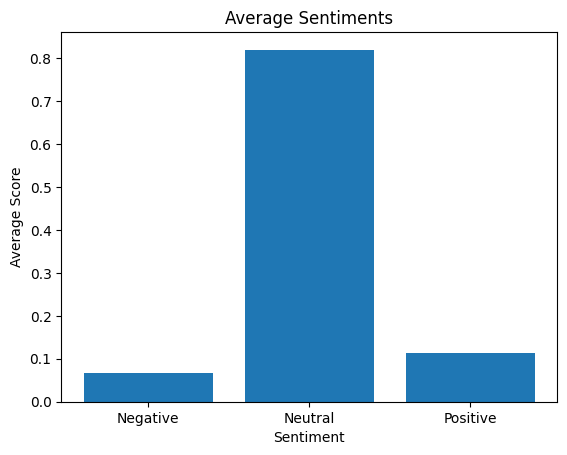

In [45]:
# Create a DataFrame
data = {
    'Sentiment': ['Negative', 'Neutral', 'Positive'],
    'Average Score': [avg_neg, avg_neu, avg_pos]
}
df = pd.DataFrame(data)

# Plot the average sentiments
plt.bar(df['Sentiment'], df['Average Score'])
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.title('Average Sentiments')
plt.show()

<p> Inspecting the novel with NLTK we can see how most of the sentences in the book are perceived as neutral and less than 10% are perceived as negative</p>